# Importing required libraries

## Medical Insurance 

This project aims to predict medical insurance charges using machine learning models based on various factors such as age, gender, BMI, number of children, smoking habits, and region. By analyzing the relationship between these features and insurance charges, the model helps identify key drivers of cost variation, enabling more accurate premium forecasting and personalized pricing for policyholders.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Reading csv file

In [ ]:
df = pd.read_csv(r"/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Inspection for missing values

Text(0.5, 1.0, 'Missing Values per Feature')

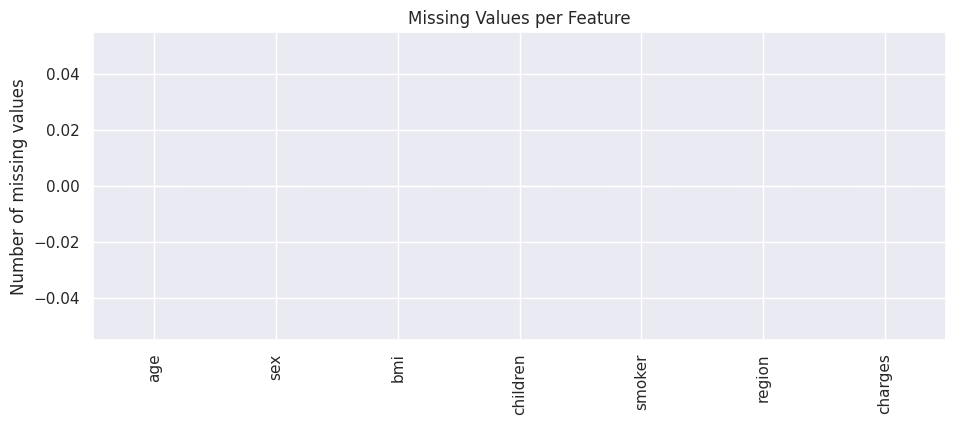

In [ ]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')

**According to my data, In each feature the missing values are not existed**

# Detecting an outliers

1. By boxplot
2. Z-score method
3. Scatter plot
4. IQR(Inter Quartile Range)


<Axes: xlabel='age'>

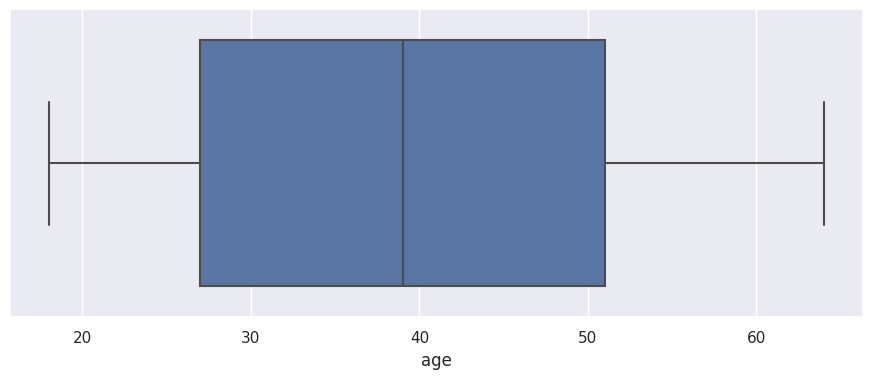

In [ ]:
sns.boxplot(x = df["age"])

**According to my data, The outliers are not extisted in age feature**

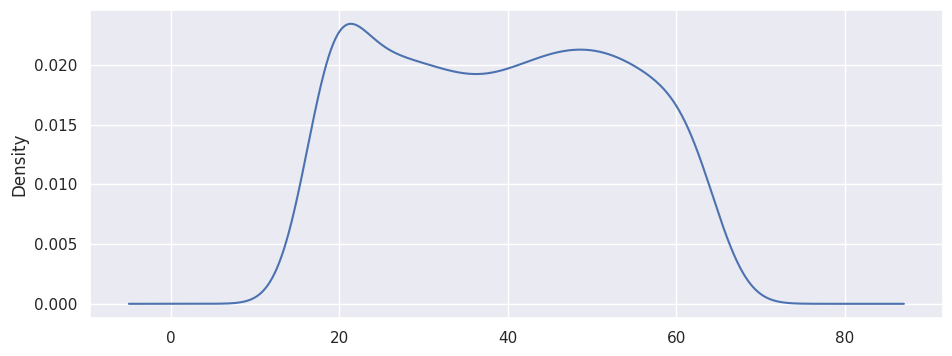

In [ ]:
df['age'].plot(kind='kde')
plt.show()

**Here we can see that, age distribution is slightly normal distributed**


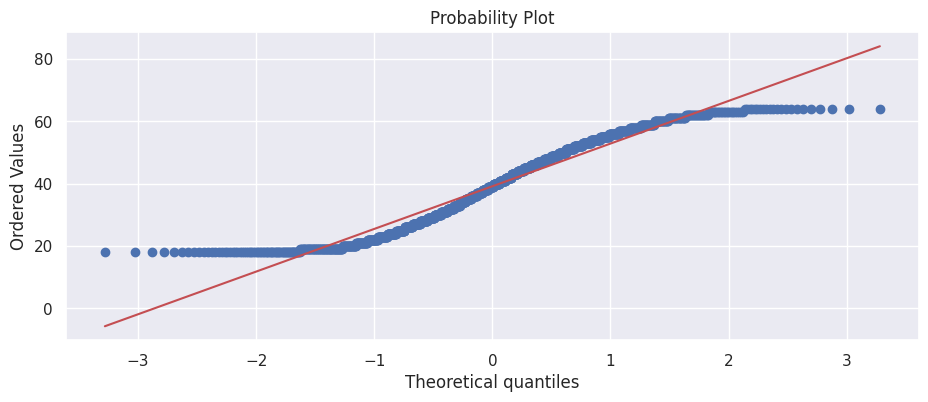

In [ ]:
stats.probplot(df['age'],dist='norm',plot=plt)
plt.show()

**from the above QQ plot, the age feature is not normally distributed.

<Axes: xlabel='bmi'>

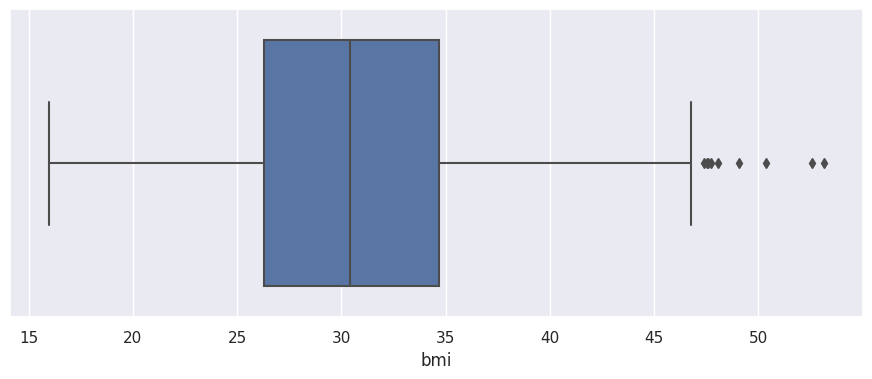

In [ ]:
sns.boxplot(x = df["bmi"])

### Treating outliers by using boxplot

In [ ]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [ ]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 8.3975
Lower_whisker : 13.7
Upper_whisker : 47.290000000000006


In [ ]:
df1 = df[(df["bmi"] > lower_whisker) & (df["bmi"] < upper_whisker)]
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df1["bmi"].min()

15.96

<Axes: xlabel='bmi'>

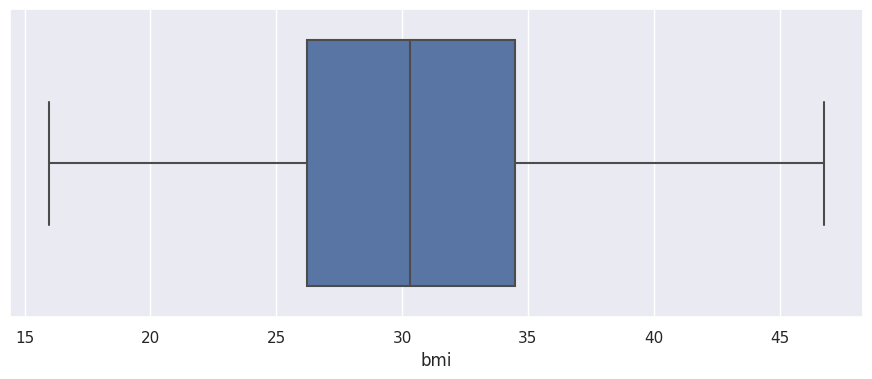

In [ ]:
sns.boxplot(x = df1["bmi"])

**Outliers are removed in bmi feature**

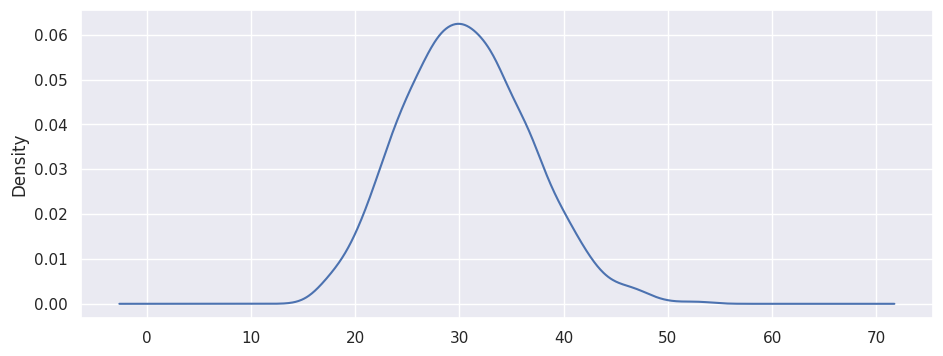

In [ ]:
df['bmi'].plot(kind='kde')
plt.show()

**By using kde plot, we can describe the distribution of bmi. So, the distribution is slightly normal distributed**

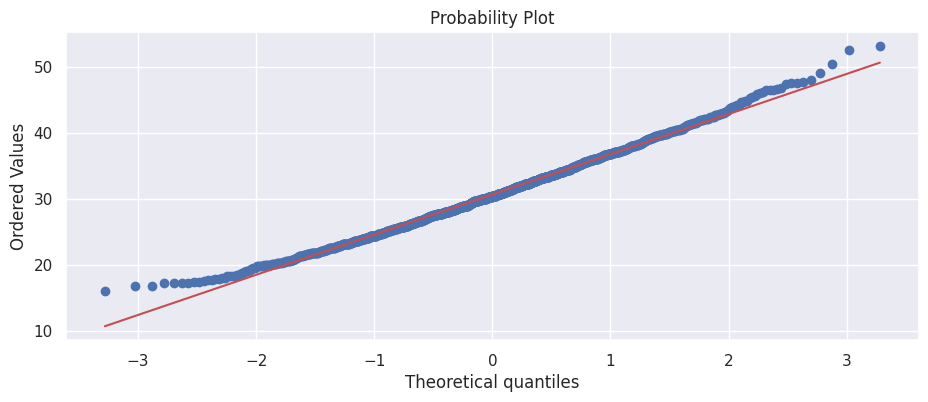

In [ ]:
stats.probplot(df['bmi'],dist='norm',plot=plt)
plt.show()

**From the above QQ plot, we can observe that bmi feature is look like a normal distribution plot**

<Axes: xlabel='children'>

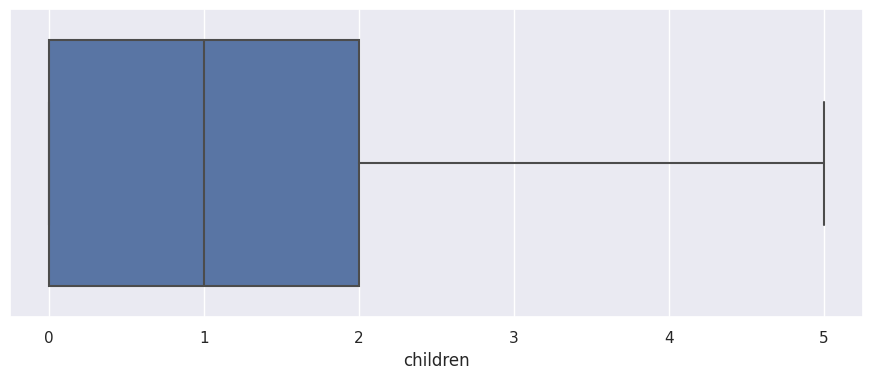

In [ ]:
sns.boxplot(x = df1["children"])

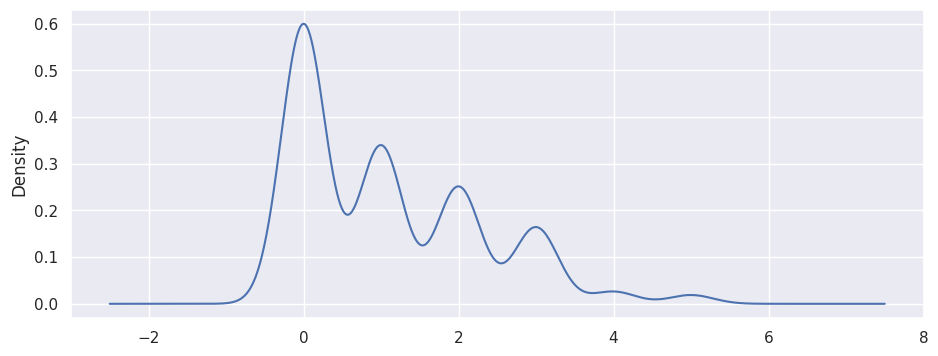

In [ ]:
df['children'].plot(kind='kde')
plt.show()

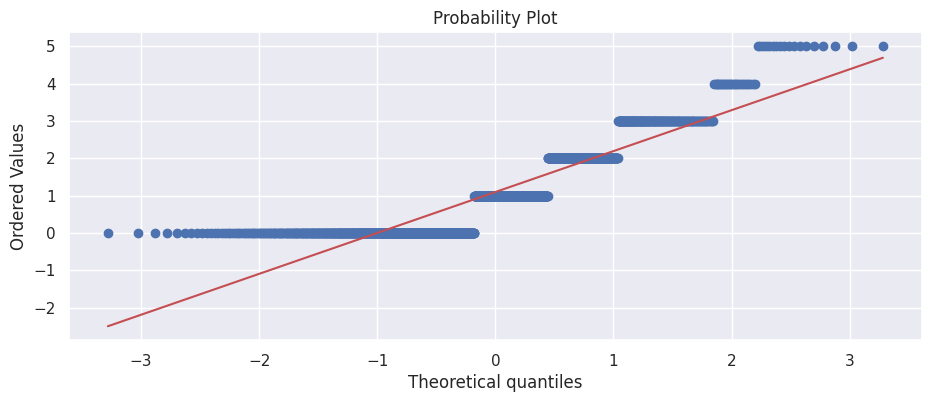

In [ ]:
stats.probplot(df['children'],dist='norm',plot=plt)
plt.show()

**From the above QQ plot, we can observe that children feature is not a normal distribution plot**

# Univariant Analysis

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

<Axes: xlabel='charges', ylabel='Count'>

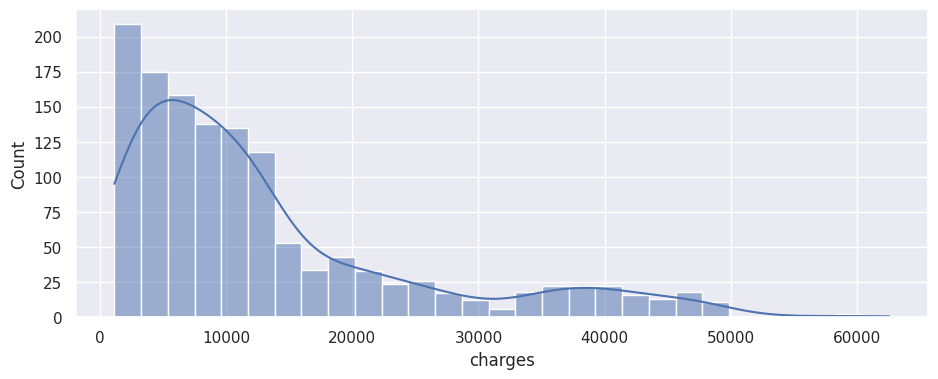

In [ ]:
sns.histplot(x = df1["charges"], kde = True)

**When we do analysis for charges, the distribution is like right-skewness**

<Axes: xlabel='region', ylabel='count'>

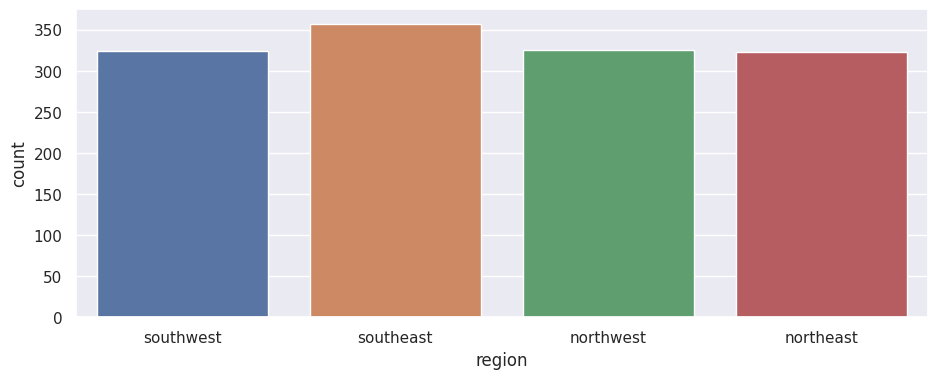

In [ ]:
sns.countplot(x = df1["region"])

**Majority of billing is recorded in southeast region**

<Axes: xlabel='sex', ylabel='count'>

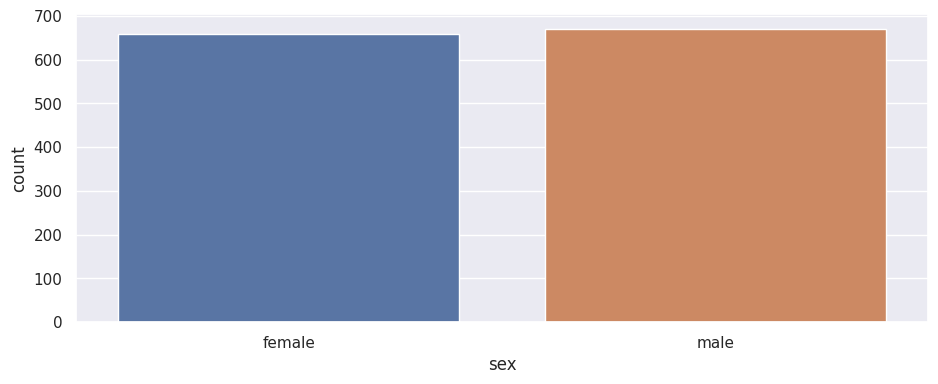

In [ ]:
sns.countplot(x = df1["sex"])

**According to my data, i can conclude that most of males are joined in Hosptials**

<Axes: xlabel='smoker', ylabel='count'>

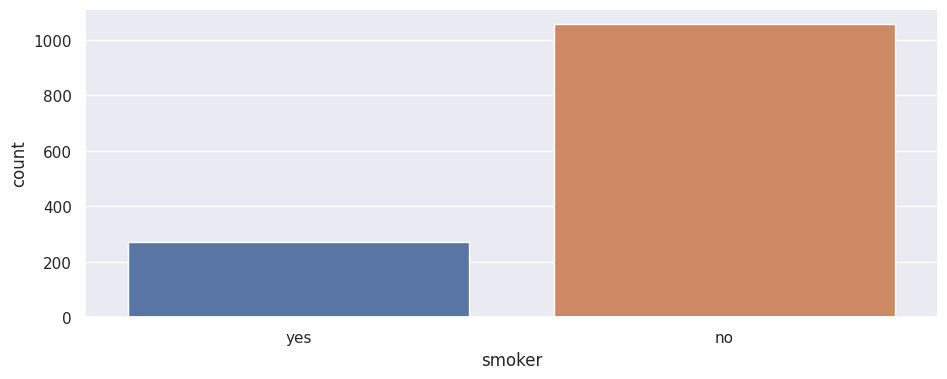

In [ ]:
sns.countplot(x = df1["smoker"])

**By seeing this, directly we can say that the people's who dont do smoke are joined in hospital**

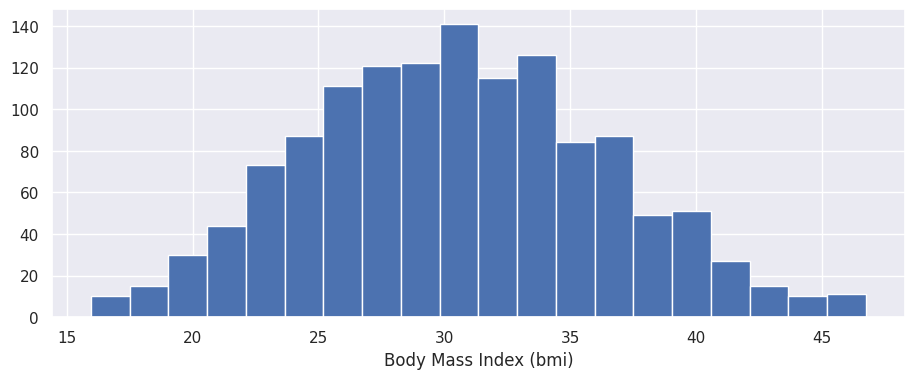

In [ ]:
plt.hist(df1["bmi"], bins = 20)
plt.xlabel("Body Mass Index (bmi)")
plt.show()

**The BMI is approximately normal distribution**

<Axes: xlabel='age', ylabel='Count'>

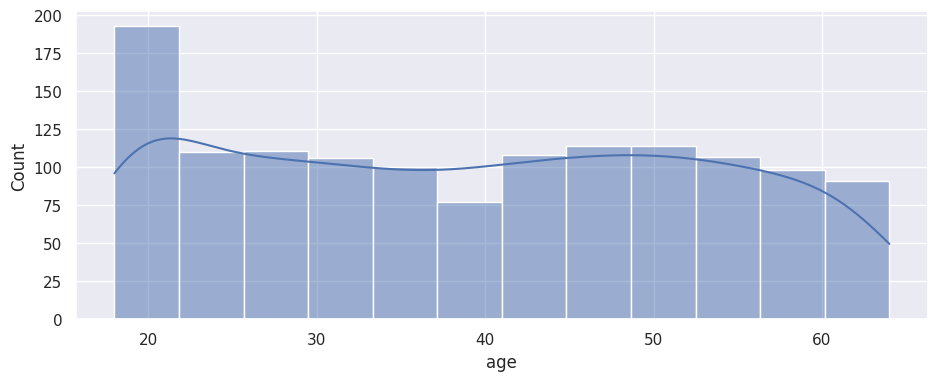

In [ ]:
sns.histplot(x = df1["age"], kde = True)

**mostly the age of 15-24 are recorded highly when compare to other**

<Axes: xlabel='children', ylabel='count'>

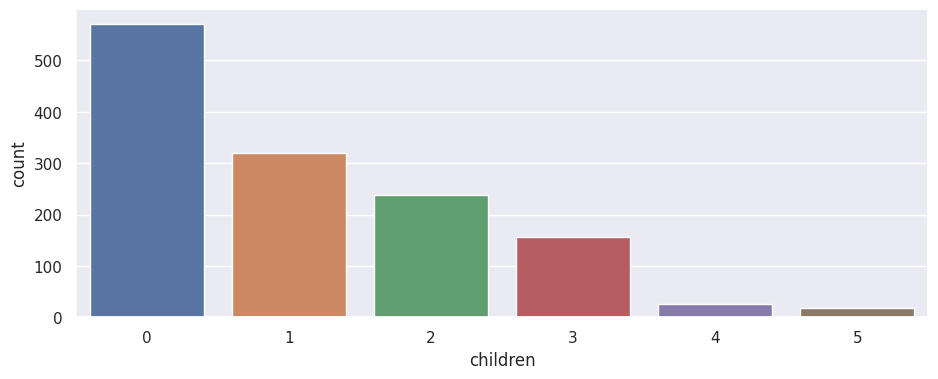

In [ ]:
sns.countplot(x = df1["children"])

**the person's who dont have childrens are joined in hosptial and these people are highly recorded**

# Bivariant Analysis

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='children', ylabel='charges'>

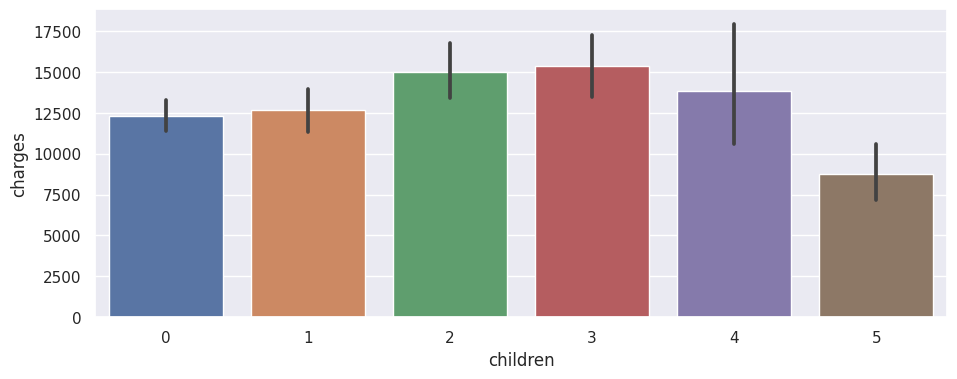

In [ ]:
sns.barplot(x = df1["children"], y = df1["charges"])

**By seeing above barplot, the person's who have min 3 childrens are paying more amount for billing**

<Axes: xlabel='region', ylabel='charges'>

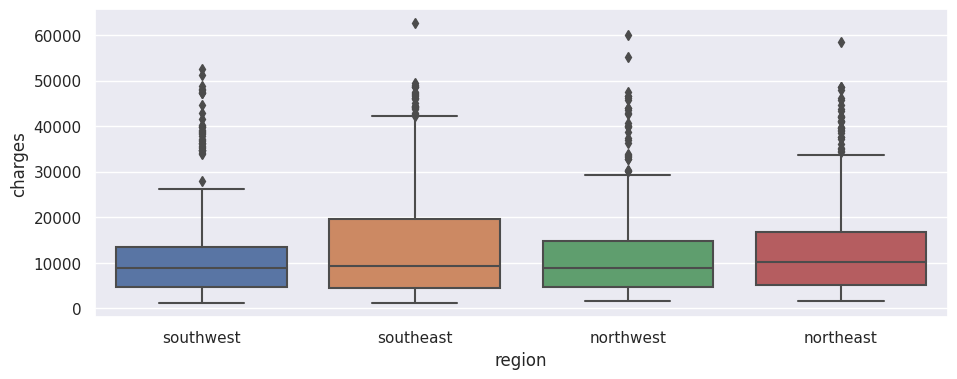

In [ ]:
sns.boxplot(x = df1["region"], y = df1["charges"])

**According to my data, i can conclude that in southwest the charges were in between 5k to 13k,it mean's less when compare to southeast**

<Axes: xlabel='smoker', ylabel='age'>

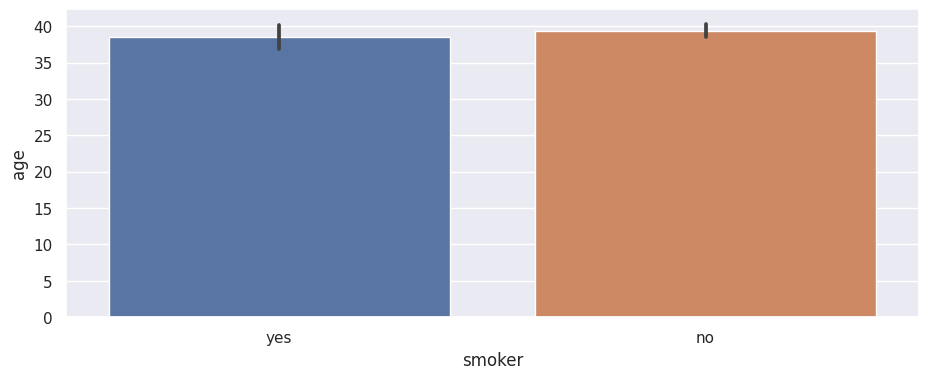

In [ ]:
sns.barplot(x = df1["smoker"], y = df1["age"])

**from the data, we can say that 55% of the people's are not smoking and remianing peoples having habit to smoke**

<Axes: xlabel='children', ylabel='age'>

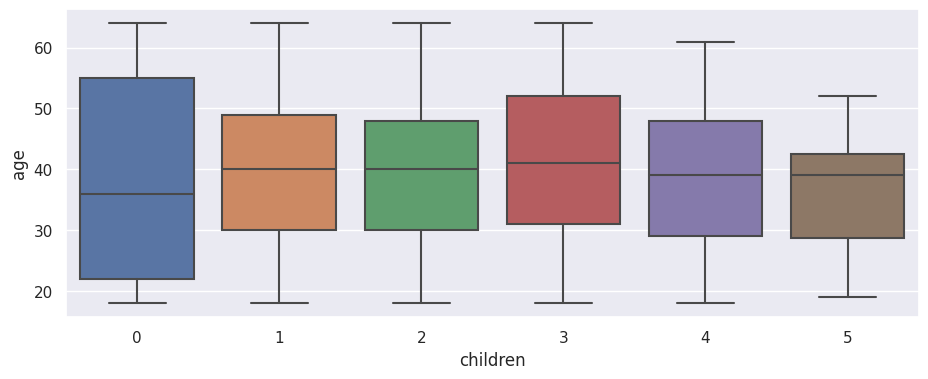

In [ ]:
sns.boxplot(x = df1["children"], y = df1["age"])

<Axes: xlabel='charges', ylabel='smoker'>

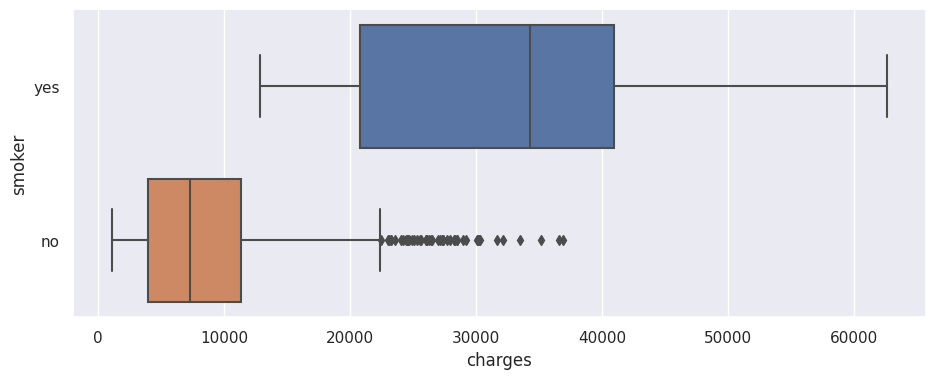

In [ ]:
sns.boxplot(x = df1["charges"], y = df1["smoker"])

**The people's who have smoking habit, they are paying high charges**

<Axes: xlabel='bmi', ylabel='charges'>

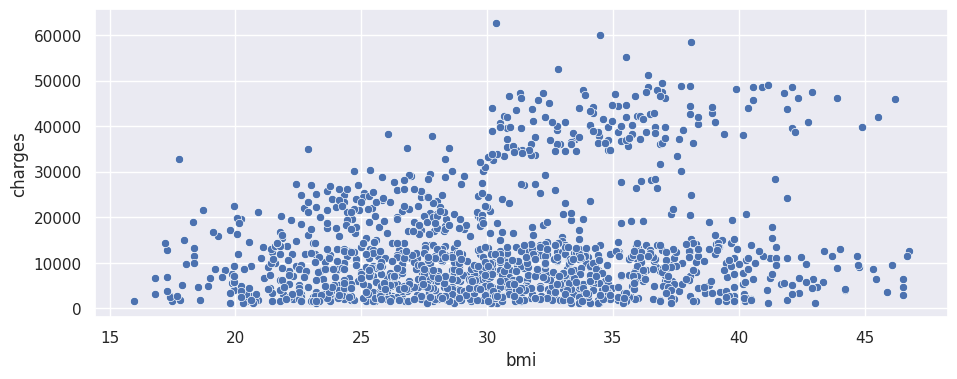

In [ ]:
sns.scatterplot(x = df1["bmi"], y = df1["charges"])

<Axes: xlabel='bmi', ylabel='charges'>

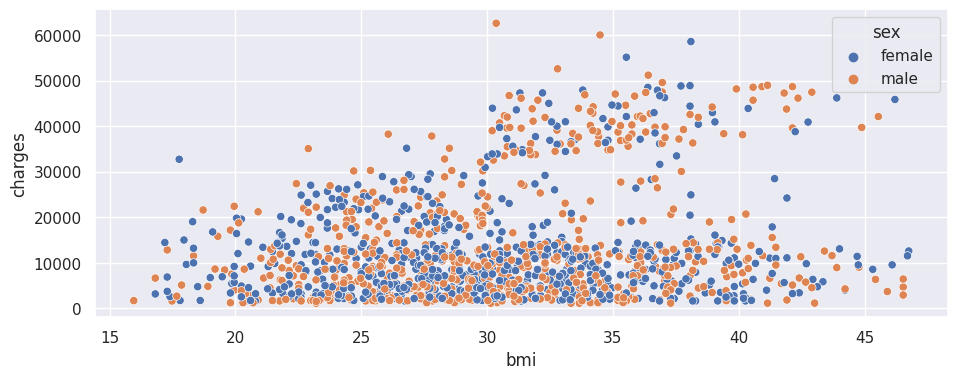

In [ ]:
sns.scatterplot(x = df1["bmi"], y = df1["charges"], hue = df1["sex"])

**By seeing scatter plot, we can say that as bmi is increasing and in the meantime charges are being constant less than 20k upto 35bmi**

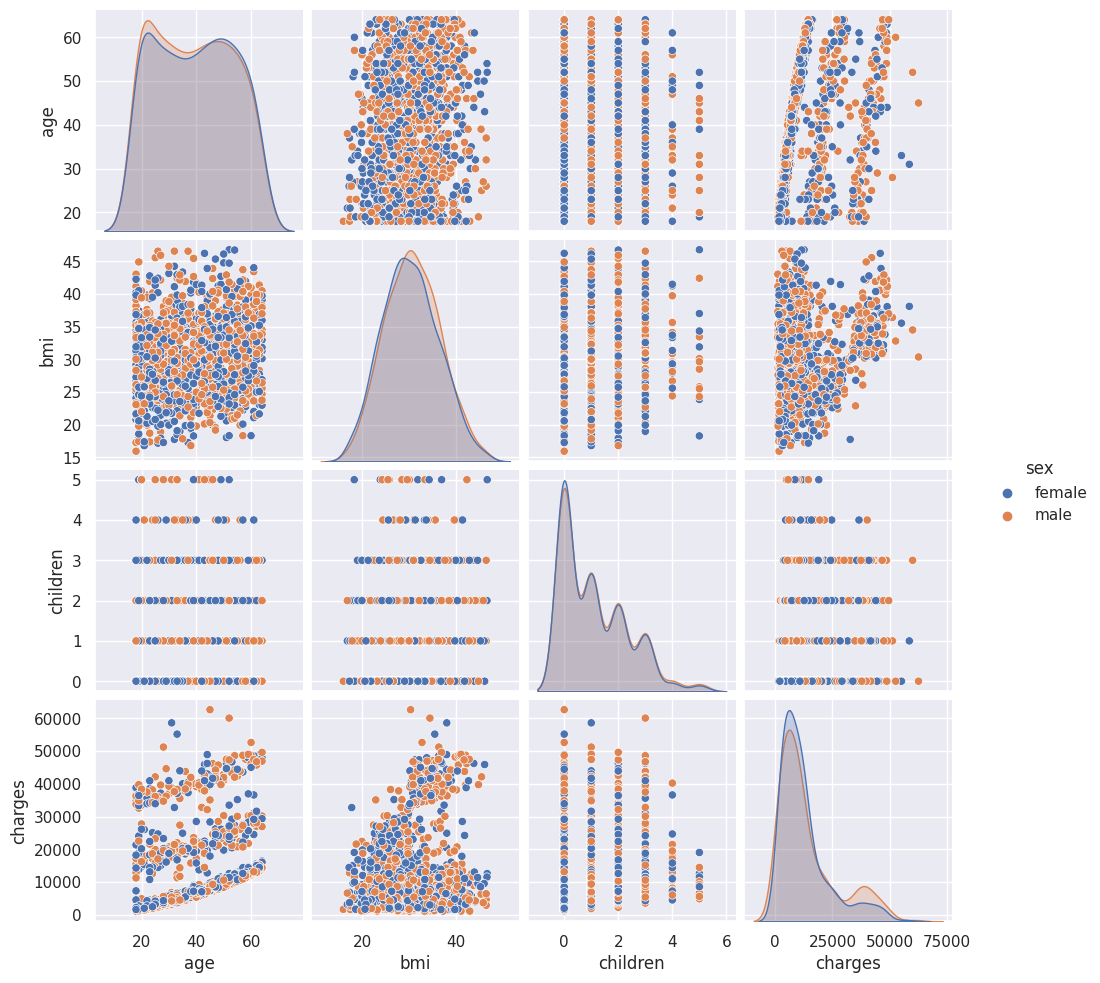

In [ ]:
sns.pairplot(df1, hue = "sex")

<ipython-input-53-ac2c59d1a304>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()
<ipython-input-53-ac2c59d1a304>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),


<Axes: >

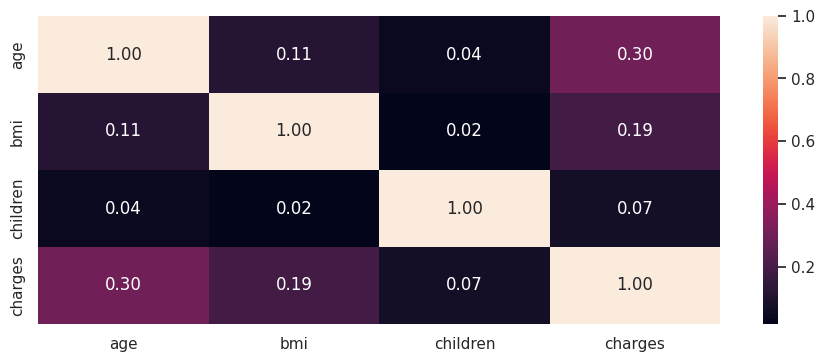

In [ ]:
df1.corr()
sns.heatmap(df1.corr(),
           annot = True,
           fmt = ".2f")

**1. as age increases charges will be increases, here it is moderately positive correlation**

## Conclusion

1. age having more impact on charges because for older people's have to pay more charges when compare to younger people's.
2. Smoker is highly impacted for charges.
3. bmi, childrens are not much impact on charges.

## Recommendations

1. As per the EDA anlaysis the insurance company should have to focus on cusotmer who have more dependents.
2. The company need to focus on more the age between 20 to 40 because it is earning stage.
3. if we put valuable charges for the smoker's as compared to other insurance companies, that would definetly make good amounts of profits and referrals as well.
4.

# SPRINT 2 - Data Preparation and Model Building

## Problem Statement

**The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.**

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


In [ ]:
# Identifying the inputs (X) and output (y)

y = df1["charges"]
X= df1[["age", "sex", "bmi", "children", "smoker", "region"]]

In [ ]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
1253,40,female,29.300,4,no,southwest
595,46,female,33.725,1,no,northeast
578,52,male,30.200,1,no,southwest
836,36,male,31.500,0,no,southwest
679,49,female,23.180,2,no,northwest


In [ ]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(996, 6) (996,)
(333, 6) (333,)


## Now segregation of categorical columns and numerical columns

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 1253 to 796
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       996 non-null    int64  
 1   sex       996 non-null    object 
 2   bmi       996 non-null    float64
 3   children  996 non-null    int64  
 4   smoker    996 non-null    object 
 5   region    996 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.5+ KB


In [ ]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [ ]:
X_train_cat = X_train.select_dtypes(include = "object")
X_train_cat.head()

,sex,smoker,region
1253,female,no,southwest
595,female,no,northeast
578,male,no,southwest
836,male,no,southwest
679,female,no,northwest


In [ ]:
X_train_num = X_train.select_dtypes(exclude = "object")
X_train_num.head()

,age,bmi,children
1253,40,29.300,4
595,46,33.725,1
578,52,30.200,1
836,36,31.500,0
679,49,23.180,2


# applying a technique on numerical data
1. Standardscaler
2. Normalisation method

In [ ]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1253,0.062525,-0.211657,2.384342
595,0.494491,0.538212,-0.095440
578,0.926457,-0.059142,-0.095440
836,-0.225452,0.161159,-0.922034
679,0.710474,-1.248764,0.731154


In [ ]:
X_train_num.describe()

,age,bmi,children
count,996.000000,996.000000,996.000000
mean,39.131526,30.548996,1.115462
std,13.896956,5.903995,1.210391
min,18.000000,15.960000,0.000000
25%,26.000000,26.315000,0.000000
50%,40.000000,30.210000,1.000000
75%,51.000000,34.520000,2.000000
max,64.000000,46.750000,5.000000


In [ ]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.1315261  30.54899598  1.11546185]
Std of each column: [13.88997826  5.90103082  1.20978353]


# Applying a technique on categorical columns
1. Label encoding for (Ordinal data)
2. OneHotEncoding for (Nominal data)

In [ ]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns=encoder.get_feature_names_out(X_train_cat.columns),
                               index = X_train_cat.index)

X_train_cat_ohe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1253,0.0,0.0,0.0,0.0,1.0
595,0.0,0.0,0.0,0.0,0.0
578,1.0,0.0,0.0,0.0,1.0
836,1.0,0.0,0.0,0.0,1.0
679,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis = 1)

X_train_transformed

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1253,0.062525,-0.211657,2.384342,0.0,0.0,0.0,0.0,1.0
595,0.494491,0.538212,-0.095440,0.0,0.0,0.0,0.0,0.0
578,0.926457,-0.059142,-0.095440,1.0,0.0,0.0,0.0,1.0
836,-0.225452,0.161159,-0.922034,1.0,0.0,0.0,0.0,1.0
679,0.710474,-1.248764,0.731154,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
806,0.062525,1.842221,-0.095440,0.0,0.0,1.0,0.0,0.0
53,-0.225452,0.657682,-0.922034,1.0,1.0,0.0,1.0,0.0
352,-0.657418,-0.482796,-0.922034,0.0,0.0,0.0,0.0,1.0
79,0.134520,0.409421,-0.922034,0.0,0.0,1.0,0.0,0.0


# Now perform Operation on test data

In [ ]:
X_test

,age,sex,bmi,children,smoker,region
1104,37,male,29.800,0,no,southwest
453,20,male,29.735,0,no,northwest
1291,19,male,34.900,0,yes,southwest
1277,32,female,29.735,0,no,northwest
523,38,female,37.730,0,no,southeast
...,...,...,...,...,...,...
844,53,male,30.495,0,no,northeast
943,19,male,22.610,0,no,northwest
1137,26,female,22.230,0,no,northwest
614,20,female,33.000,0,no,southeast


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1104 to 407
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       333 non-null    int64  
 1   sex       333 non-null    object 
 2   bmi       333 non-null    float64
 3   children  333 non-null    int64  
 4   smoker    333 non-null    object 
 5   region    333 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.2+ KB


In [ ]:
X_test.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [ ]:
X_test_cat = X_test.select_dtypes(include = "object")
X_test_cat.head()

,sex,smoker,region
1104,male,no,southwest
453,male,no,northwest
1291,male,yes,southwest
1277,female,no,northwest
523,female,no,southeast


In [ ]:
X_test_num = X_test.select_dtypes(exclude = "object")
X_test_num.head()

,age,bmi,children
1104,37,29.800,0
453,20,29.735,0
1291,19,34.900,0
1277,32,29.735,0
523,38,37.730,0


In [ ]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                               columns=encoder.get_feature_names_out(X_test_cat.columns),
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1104,1.0,0.0,0.0,0.0,1.0
453,1.0,0.0,1.0,0.0,0.0
1291,1.0,1.0,0.0,0.0,1.0
1277,0.0,0.0,1.0,0.0,0.0
523,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                    columns = X_test_num.columns,
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
1104,-0.153458,-0.126926,-0.922034
453,-1.377362,-0.137941,-0.922034
1291,-1.449356,0.737329,-0.922034
1277,-0.513430,-0.137941,-0.922034
523,-0.081463,1.216907,-0.922034


In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled ,X_test_cat_ohe], axis = 1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1104,-0.153458,-0.126926,-0.922034,1.0,0.0,0.0,0.0,1.0
453,-1.377362,-0.137941,-0.922034,1.0,0.0,1.0,0.0,0.0
1291,-1.449356,0.737329,-0.922034,1.0,1.0,0.0,0.0,1.0
1277,-0.513430,-0.137941,-0.922034,0.0,0.0,1.0,0.0,0.0
523,-0.081463,1.216907,-0.922034,0.0,0.0,0.0,1.0,0.0


# Applying Regression Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
y_test_pred = regressor.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1104,20420.60465,5949.681900
453,1769.53165,2745.925155
1291,34828.65400,26803.401306
1277,4357.04365,5875.484692
523,5397.61670,9636.052232


In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4216.628979172493
Mean Squared Error:  35982258.52813224
Root Mean Squared Error:  5998.521361813446


<Axes: xlabel='charges', ylabel='Count'>

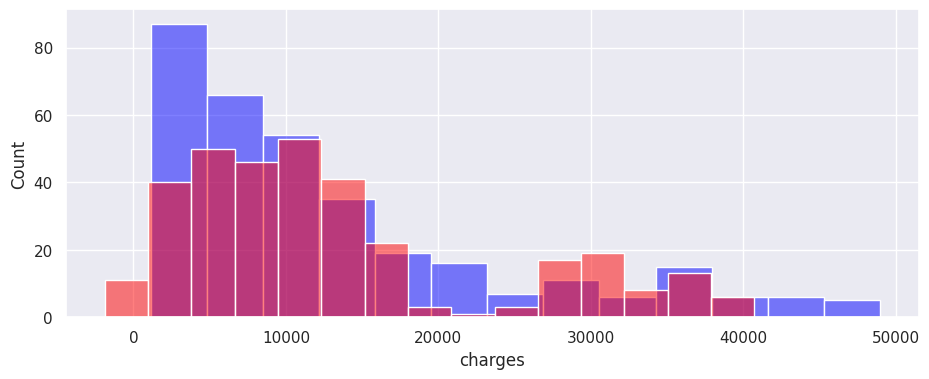

In [ ]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [ ]:
y_test_pred = regressor.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1104,20420.60465,4075.76560
453,1769.53165,2165.43066
1291,34828.65400,14920.41793
1277,4357.04365,3824.17022
523,5397.61670,6115.68122


In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4084.6936883165163
Mean Squared Error:  45609179.04093003
Root Mean Squared Error:  6753.4568215788595


<Axes: xlabel='charges', ylabel='Count'>

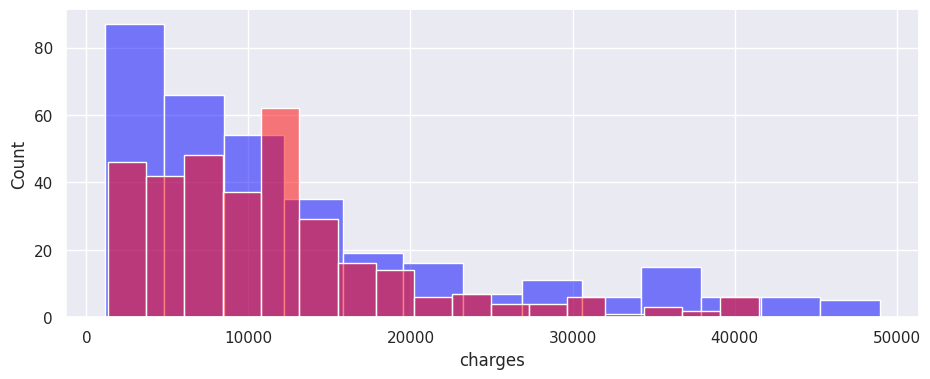

In [ ]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [ ]:
y_test_pred = regressor.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1104,20420.60465,4797.403269
453,1769.53165,2421.034966
1291,34828.65400,36331.504260
1277,4357.04365,4222.425904
523,5397.61670,6265.235421


In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2678.030019908639
Mean Squared Error:  24205816.221073736
Root Mean Squared Error:  4919.940672515649


<Axes: xlabel='charges', ylabel='Count'>

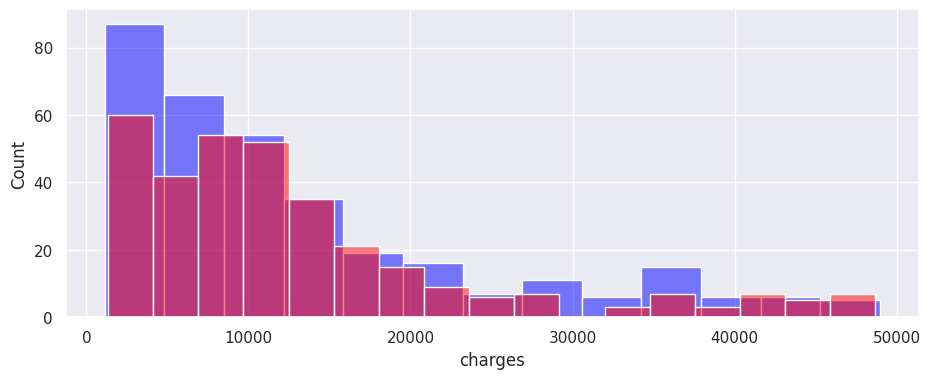

In [ ]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# Conculsion

Here we concluded that Decision Tree and Random Forest Regression are performing good rather then Liner Regression, KNN and Support Vector Machine